In [58]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn import preprocessing , neighbors ,svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

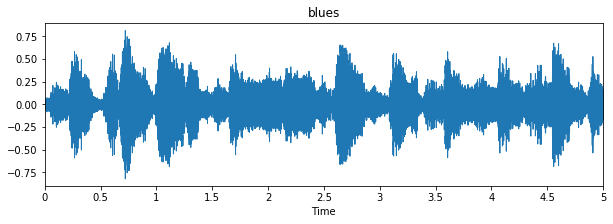

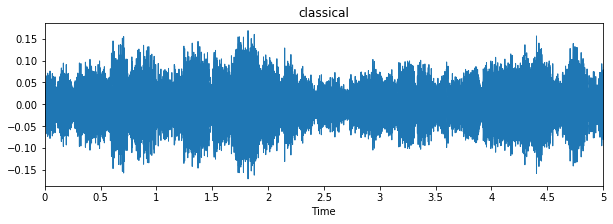

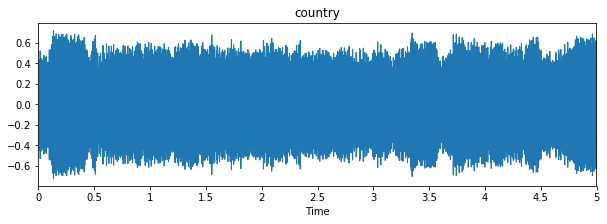

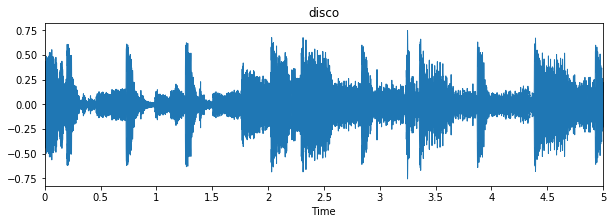

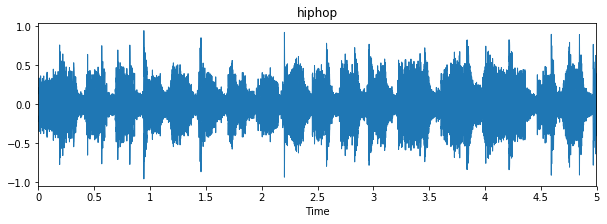

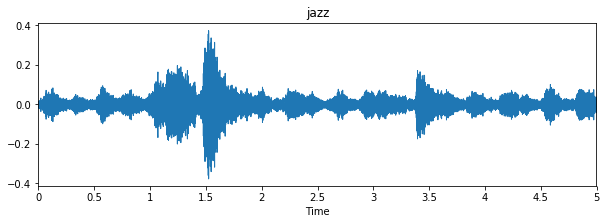

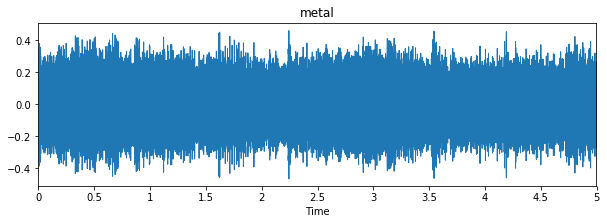

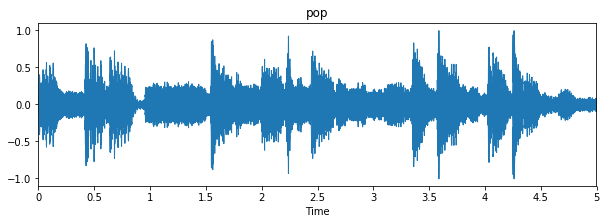

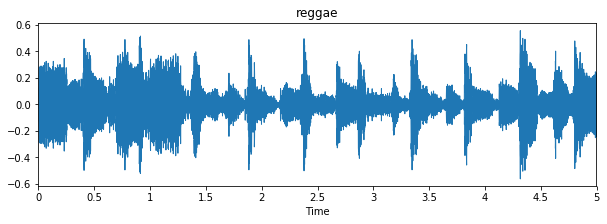

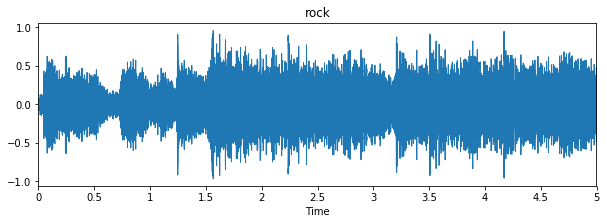

In [24]:
#ploting one from each genre in a spectogram

genres='blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:     
    song=f'./genres/{g}/{g}.00000.wav'
    x, sr=librosa.load(song, mono=True, duration=5)
    plt.figure(figsize=(10, 3))
    plt.title(g)
    librosa.display.waveplot(x, sr)

In [36]:
#extracting features to .csv file

header='filename chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header+=f' mfcc{i}'
header+=' label'
header=header.split()

file=open('data.csv', 'w', newline='')
with file:
    writer=csv.writer(file)
    writer.writerow(header)
genres='blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for f in os.listdir(f'./genres/{g}'):
        song=f'./genres/{g}/{f}'
        x, sr=librosa.load(song,mono=True,duration=30)
        chroma_stft=librosa.feature.chroma_stft(x,sr)
        rms=librosa.feature.rms(x)
        spec_cent=librosa.feature.spectral_centroid(x,sr)
        spec_bw=librosa.feature.spectral_bandwidth(x,sr)
        rolloff=librosa.feature.spectral_rolloff(x,sr)
        zcr=librosa.feature.zero_crossing_rate(y)
        mfcc=librosa.feature.mfcc(x,sr)
        to_append=f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append+=f' {np.mean(e)}'
        to_append+=f' {g}'
        file=open('data.csv', 'a', newline='')
        with file:
            writer=csv.writer(file)
            writer.writerow(to_append.split())


In [46]:
data=pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158827,...,8.810669,-3.667369,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00000.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.083066,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00000.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.083066,-90.754387,140.459915,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218360,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00000.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.083066,-199.431152,150.099213,5.647593,...,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00000.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.083066,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [47]:
data=data.drop(['filename'],axis=1)

In [54]:
#encoding label and standardizing the data
genrelist=data.iloc[:, -1]
encoder=LabelEncoder()
y=encoder.fit_transform(genrelist)
scaler=StandardScaler()
x=scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [55]:
#splitting the data

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2)

In [56]:
#KNN

clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.615


In [59]:
#SVM

clf=svm.SVC()
clf.fit(x_train,y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.71


In [60]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.525
